# LIMPIEZA 3 18/8

Hipótesis
1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.

2. El número de veces que se ha contactado a un cliente en el pasado (campo campaign), el número de días que han pasado desde el último contacto (campo pdays), y el resultado de la campaña anterior (campo poutcome) pueden afectar la respuesta del cliente a una nueva oferta.

3. Las variables económicas (tales como el índice de precios al consumidor (cons.price.idx), la tasa de variación del empleo (emp.var.rate), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.

4. Los clientes que ya tienen una hipoteca (housing) o un préstamo (loan) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("data/pair2_bank_additional_full.csv", index_col = 0)

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [31]:
df_numericas = df.select_dtypes(include=np.number)

In [32]:
df_numericas.head(2)

,index,age,default,housing,loan,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,0,56,0.0,0.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,1,57,NaN,0.0,0.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0


2. Identifica visualmente los outliers

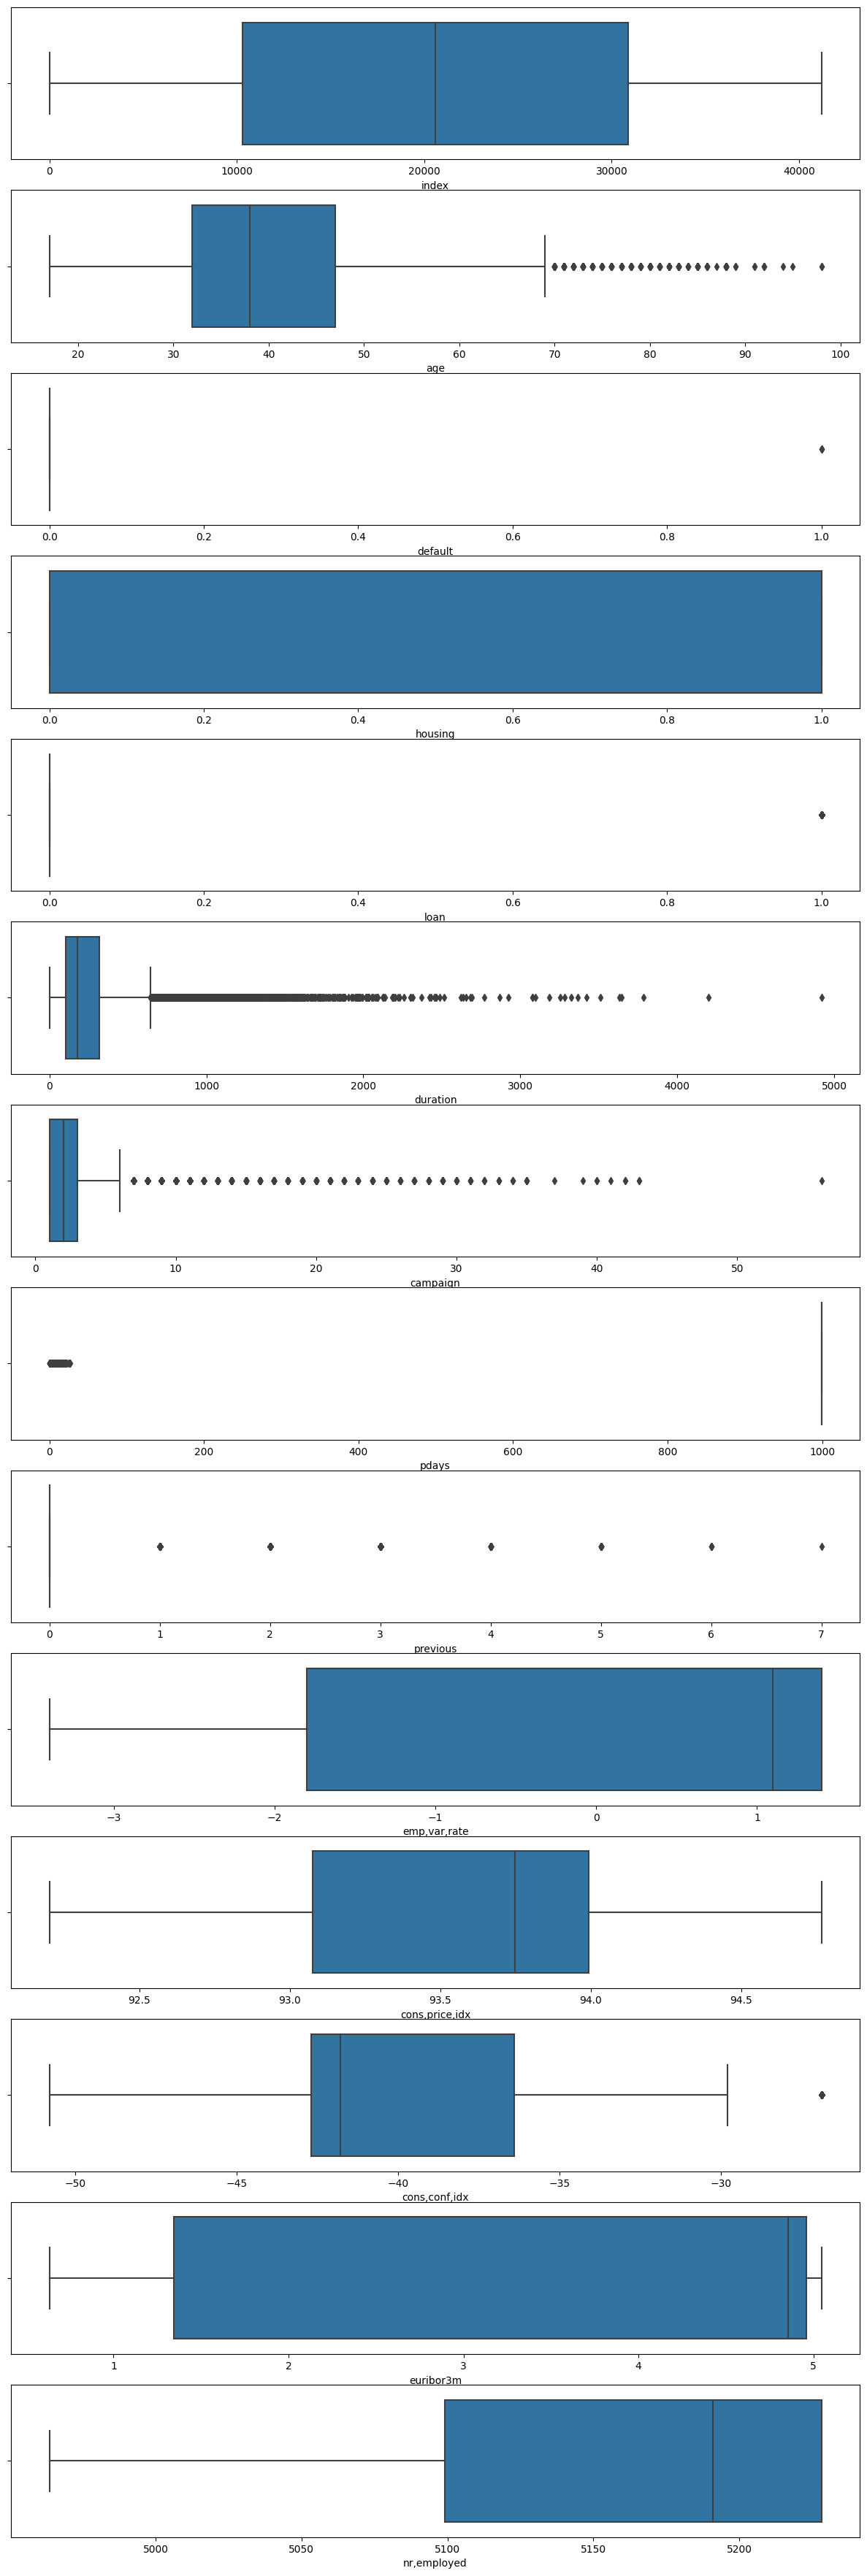

In [33]:
fig, ax = plt.subplots(14, 1, figsize=(15,45))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3. Identifica sobre el dataframe las filas que son outliers

In [34]:
def detec_outliers(list_col, dataframe):
    dicc_indices = {}
    for col in list_col:
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        IQR = Q3 - Q1
        distancia_outliers = IQR * 1.5
        outliers_data = dataframe[(dataframe[col]<Q1 - distancia_outliers) | (dataframe[col] > Q3 + distancia_outliers)]
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
    return dicc_indices

In [35]:
lista_columnas = list(df_numericas.columns)
lista_columnas

['index',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp,var,rate',
 'cons,price,idx',
 'cons,conf,idx',
 'euribor3m',
 'nr,employed']

In [36]:
indices = detec_outliers(lista_columnas, df)

In [37]:
for k, v in indices.items():
    print(k,v)

age [27705, 27749, 27772, 27792, 27794, 27797, 27800, 27802, 27803, 27804, 27805, 27806, 27807, 27808, 27809, 27810, 27818, 27829, 27830, 27836, 27843, 27867, 27871, 27894, 27922, 27942, 27943, 27955, 28212, 28213, 28304, 28448, 28495, 28521, 28531, 28577, 28610, 28723, 28764, 29216, 29254, 29489, 29616, 29659, 29673, 29964, 29968, 29972, 29978, 29981, 29991, 29995, 29997, 30063, 30069, 30070, 30079, 30094, 30101, 30124, 30162, 30205, 30216, 30218, 30232, 30325, 30326, 30381, 30421, 30451, 30580, 35823, 35838, 35846, 35868, 35963, 36173, 36275, 36301, 36373, 36374, 36806, 36987, 37125, 37126, 37159, 37175, 37179, 37181, 37182, 37184, 37195, 37196, 37202, 37208, 37216, 37224, 37226, 37228, 37246, 37249, 37305, 37330, 37344, 37360, 37392, 37443, 37444, 37461, 37468, 37482, 37494, 37498, 37501, 37514, 37521, 37534, 37557, 37559, 37575, 37586, 37590, 37591, 37593, 37624, 37650, 37664, 37668, 37679, 37681, 37704, 37705, 37724, 37725, 37732, 37745, 37754, 37758, 37764, 37773, 37807, 37808, 3

4. Reemplaza los outliers por el estadístico más correcto.

In [38]:
df2 = df
dicc_mediana = {}
for k, v in indices.items():
    mediana = df2[k].median()
    dicc_mediana[k] = mediana
    for i in v:
        df2.loc[i,k] = mediana
df_num2 = df2.select_dtypes(include = np.number)
print(dicc_mediana)

{'age': 38.0, 'default': 0.0, 'loan': 0.0, 'duration': 180.0, 'campaign': 2.0, 'pdays': 999.0, 'previous': 0.0, 'cons,conf,idx': -41.8}


In [39]:
# Comprobamos si todos los cambios se han efectuado correctamente.
# 1. Recorremos el diccionario creado anteriormente donde guardamos los valores de la mediana para cada columna (for k, v in dicc_mediana.items())
# 2. Comprobamos la media de cada columna analizada en los índices afectados (df_num2[k].iloc[indices[k]].mean()) y comprobamos si su valor es igual a la mediana generada anteriormente (v)
for k, v in dicc_mediana.items():
    print(f"'{k}' valor correcto: {df_num2[k].iloc[indices[k]].mean() == v}")

'age' valor correcto: True
'default' valor correcto: True
'loan' valor correcto: True
'duration' valor correcto: True
'campaign' valor correcto: True
'pdays' valor correcto: True
'previous' valor correcto: True
'cons,conf,idx' valor correcto: False


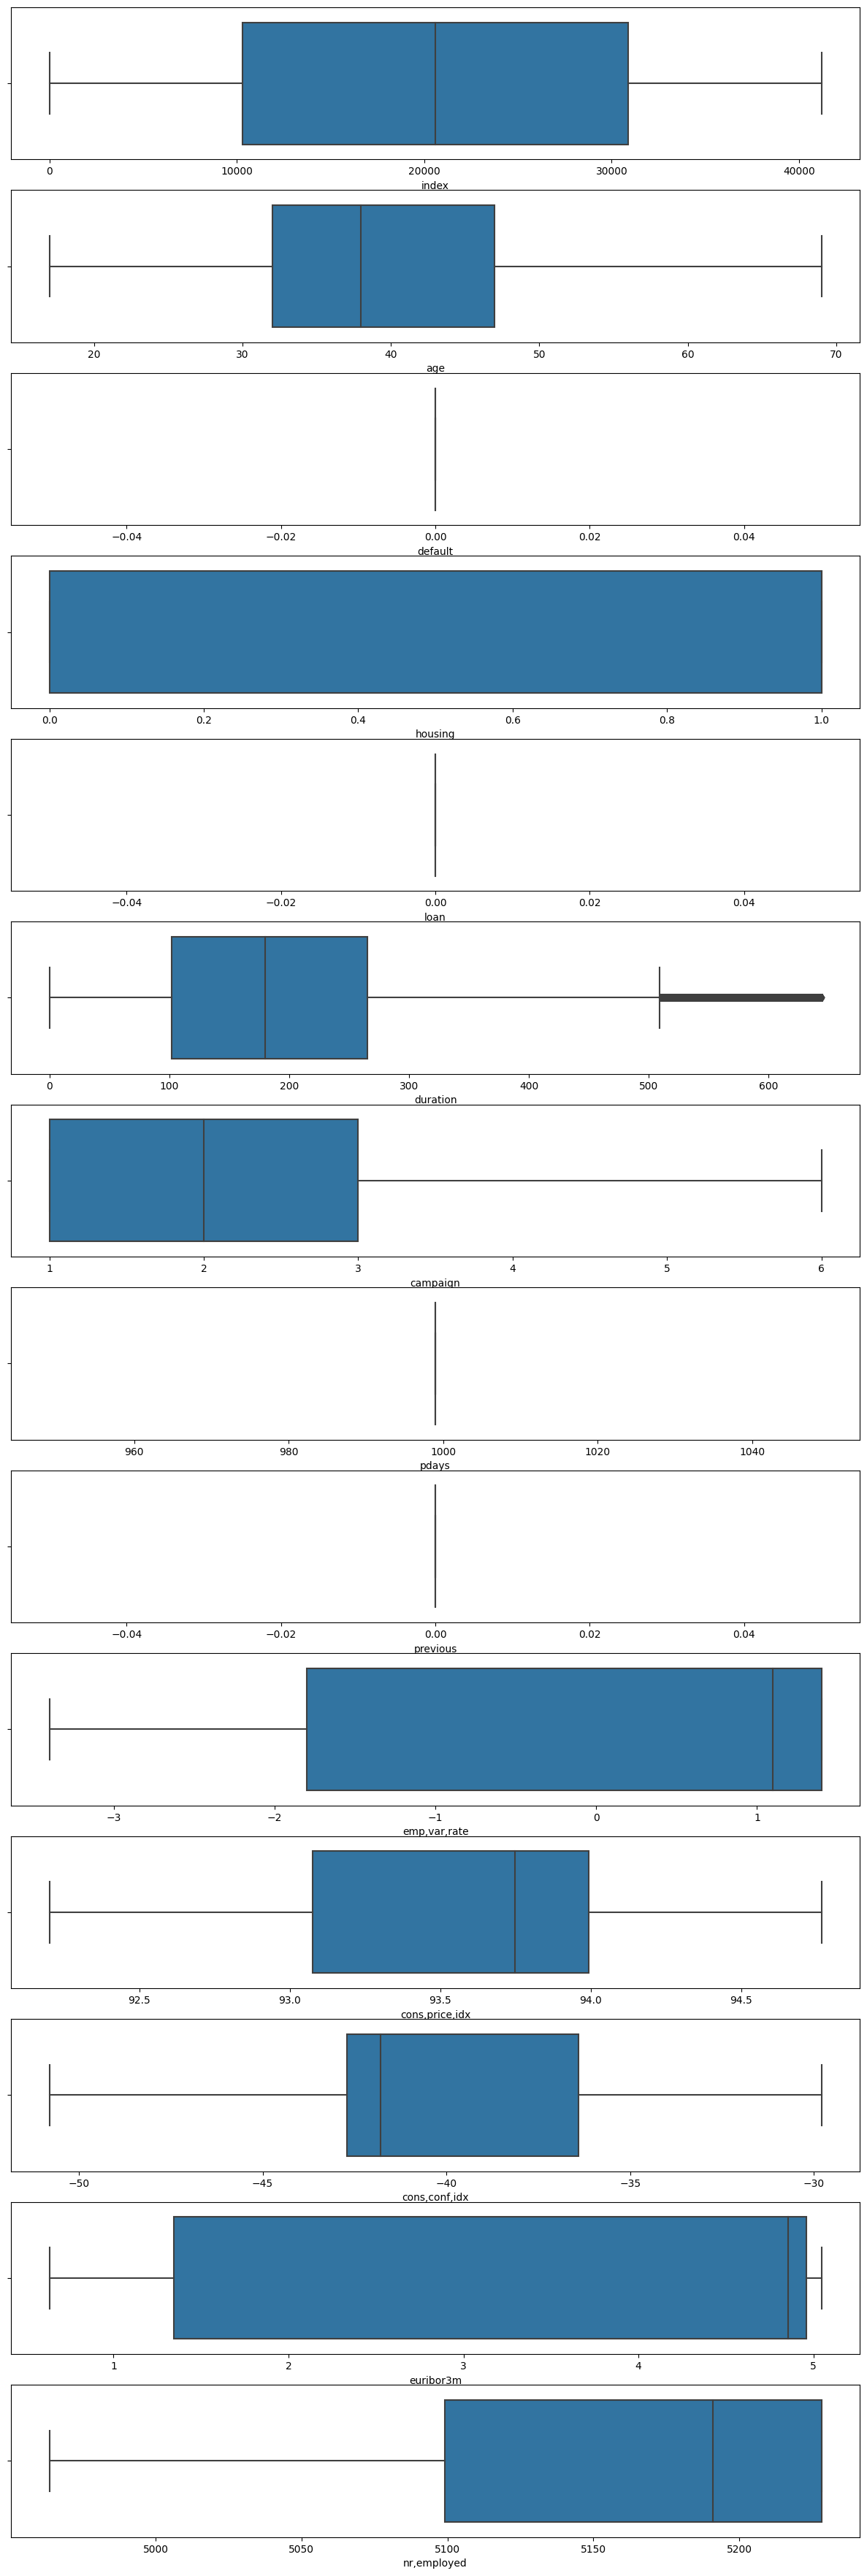

In [40]:
fig, ax = plt.subplots(14, 1, figsize=(15,45))

for i in range(len(df_num2.columns)):
    sns.boxplot(x=df_num2.columns[i], data=df_num2, ax=ax[i])
plt.show()

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [41]:
df_num2.to_csv("data/pair3_bank_additional_full.csv")